### Arithmetic and Data Alignment(Aritmetik ve Veri Hizalama)

In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 

In [3]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [4]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
              index=['a', 'c', 'e', 'f', 'g'])

In [5]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [6]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [7]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [9]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                  index=['Ohio', 'Texas', 'Colorado'])

In [10]:
 df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [11]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [12]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [13]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [14]:
df1 = pd.DataFrame({'A': [1,2]})

In [15]:
df2 = pd.DataFrame({'B': [3,4]})

In [16]:
df1

,A
0,1
1,2


In [17]:
df2

,B
0,3
1,4


In [19]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [20]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                  columns=list('abcd'))

In [21]:
df2 - pd.DataFrame(np.arange(20.).reshape((4, 5)),
                  columns=list('abcde'))

,B,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df2.loc[1, 'b'] = np.nan

In [23]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [26]:
df2

,B,b
0,3,NaN
1,4,NaN


In [27]:
df1 + df2

,B,a,b,c,d
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN


In [28]:
df1.add(df2, fill_value=0)

,B,a,b,c,d
0,3.0,0.0,1.0,2.0,3.0
1,4.0,4.0,5.0,6.0,7.0
2,NaN,8.0,9.0,10.0,11.0


In [29]:
1/df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [30]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [31]:
df1.reindex(columns=df2.columns, fill_value=0)

,B,b
0,0,1.0
1,0,5.0
2,0,9.0


#### Operations between DataFrame and Series

In [33]:
arr = np.arange(12.).reshape(3, 4)

In [34]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [35]:
arr[0]

array([0., 1., 2., 3.])

In [36]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [39]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [40]:
series = frame.iloc[0]

In [41]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [42]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [43]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [44]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [45]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [46]:
series3 = frame['d']

In [47]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [48]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [49]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

In [50]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [51]:
frame

,b,d,e
Utah,-0.519634,0.073349,0.753857
Ohio,0.052015,-0.097496,1.319941
Texas,0.239784,-0.105028,-0.407991
Oregon,0.362680,-0.706293,2.052407


In [52]:
np.abs(frame)

,b,d,e
Utah,0.519634,0.073349,0.753857
Ohio,0.052015,0.097496,1.319941
Texas,0.239784,0.105028,0.407991
Oregon,0.362680,0.706293,2.052407


In [53]:
f = lambda x: x.max() - x.min()

In [54]:
frame.apply(f)

b    0.882314
d    0.779643
e    2.460398
dtype: float64

In [55]:
frame.apply(f, axis='columns')

Utah      1.273491
Ohio      1.417436
Texas     0.647776
Oregon    2.758700
dtype: float64

In [56]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [57]:
 frame.apply(f)

,b,d,e
min,-0.519634,-0.706293,-0.407991
max,0.362680,0.073349,2.052407


In [58]:
format = lambda x: '%.2f' % x

In [59]:
frame.applymap(format)

,b,d,e
Utah,-0.52,0.07,0.75
Ohio,0.05,-0.10,1.32
Texas,0.24,-0.11,-0.41
Oregon,0.36,-0.71,2.05


In [60]:
frame['e'].map(format)

Utah       0.75
Ohio       1.32
Texas     -0.41
Oregon     2.05
Name: e, dtype: object

### Sorting and Ranking


In [3]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [4]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [5]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                    index=['three', 'one'],
                    columns=['d','a','b','c'])

In [6]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [7]:
frame.sort_index(axis=1) #sutuna göre sıralama yapar.

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [8]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [9]:
obj = pd.Series([4, 7, -3, 2])

In [10]:
obj.sort_values() #küçükten büyüğe

2   -3
3    2
0    4
1    7
dtype: int64

In [11]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [12]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [13]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [14]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [15]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [16]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [17]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [19]:
obj.rank() #degerleri sıralayıp indexlere göre gösterir

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [20]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [22]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [23]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                     'c': [-2, 5, 8, -2.5]})

In [24]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [25]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [26]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [27]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [28]:
obj.index.is_unique

False

In [29]:
obj['a']

a    0
a    1
dtype: int64

In [30]:
obj['c']

4

In [31]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [32]:
df

,0,1,2
a,0.135880,0.676641,0.009154
a,-0.163571,0.832722,1.716748
b,0.018226,-0.467725,0.199834
b,-1.350212,0.706770,-2.054199


In [33]:
df.loc['b']

,0,1,2
b,0.018226,-0.467725,0.199834
b,-1.350212,0.706770,-2.054199


## 5.3 Summarizing and Computing Descriptive Statistics

In [3]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [4]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [5]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [6]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [7]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [8]:
df.idxmax()

one    b
two    d
dtype: object

In [9]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [10]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [11]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [12]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance

In [5]:
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [17]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})

NameError: name 'all_data' is not defined

In [18]:
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

NameError: name 'all_data' is not defined

In [19]:
returns = price.pct_change()

NameError: name 'price' is not defined

### Unique Values, Value Counts, and Membership

In [20]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [21]:
uniques = obj.unique()

In [22]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [23]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [24]:
pd.value_counts(obj.values, sort=False)

d    1
a    3
b    2
c    3
dtype: int64

In [25]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [26]:
mask = obj.isin(['b', 'c'])

In [27]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [28]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [29]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [30]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [31]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [32]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

In [33]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [34]:
result = data.apply(pd.value_counts).fillna(0)

In [35]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


#### CHAPTER 6
## Data Loading, Storage, and File Formats

### 6.1 Reading and Writing Data in Text Format

In [8]:
df = pd.read_csv('ex1.csv')

In [9]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
 pd.read_table('ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
pd.read_csv('ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
pd.read_csv('ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
names = ['a', 'b', 'c', 'd', 'message']

In [14]:
pd.read_csv('ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [16]:
parsed = pd.read_csv('csv_mindex.csv',
                     index_col=['key1', 'key2'])

In [17]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [19]:
list(open('ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [20]:
result = pd.read_table('ex3.txt', sep='\s+')

In [21]:
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [22]:
pd.read_csv('ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [23]:
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [24]:
pd.isnull(result)

,A,B,C
aaa,False,False,False
bbb,False,False,False
ccc,False,False,False
ddd,False,False,False


In [25]:
result = pd.read_csv('ex5.csv', na_values=['NULL'])

In [26]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [27]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}

In [28]:
pd.read_csv('ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### Reading Text Files in Pieces

In [29]:
pd.options.display.max_rows = 10

In [30]:
result = pd.read_csv('ex6.csv')

In [31]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [32]:
pd.read_csv('ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [33]:
chunker = pd.read_csv('ex6.csv', chunksize=1000)

In [34]:
chunker

In [37]:
 tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### Writing Data to Text Format

In [38]:
data = pd.read_csv('ex5.csv')

In [39]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [40]:
 data.to_csv('out.csv')

In [41]:
 import sys

In [42]:
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [43]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [44]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [45]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [46]:
dates = pd.date_range('1/1/2000', periods=7)

In [47]:
ts = pd.Series(np.arange(7), index=dates)

In [49]:
ts.to_csv('tseries.csv')

### Working with Delimited Formats

In [50]:
import csv

In [51]:
f = open('ex7.csv')

In [52]:
reader = csv.reader(f)

In [53]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [56]:
with open('ex7.csv') as f:
      lines = list(csv.reader(f))

In [57]:
header, values = lines[0], lines[1:]

In [58]:
data_dict = {h: v for h, v in zip(header, zip(*values))}

In [59]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

### JSON Data

In [60]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
 {"name": "Katie", "age": 38,
 "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [61]:
 import json

In [62]:
result = json.loads(obj)

In [63]:
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [64]:
 asjson = json.dumps(result)

In [65]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])

In [66]:
siblings

,name,age
0,Scott,30
1,Katie,38


In [67]:
data = pd.read_json('example.json')

In [68]:
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [69]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [70]:
 print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML and HTML: Web Scraping

In [71]:
tables = pd.read_html('fdic_failed_bank_list.html')

In [72]:
len(tables)

1

In [73]:
failures = tables[0]

In [74]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [75]:
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [76]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

In [77]:
perf = pd.DataFrame(data)

In [78]:
perf.head()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [81]:
from lxml import objectify
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [82]:
root

<Element a at 0x26cd6926700>

In [83]:
root.get('href')

'http://www.google.com'

In [84]:
root.text

'Google'

## 6.2 Binary Data Formats

In [85]:
 frame = pd.read_csv('ex1.csv')

In [86]:
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [87]:
frame.to_pickle('frame_pickle')

In [88]:
pd.read_pickle('frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Using HDF5 Format

In [89]:
frame = pd.DataFrame({'a': np.random.randn(100)})

In [90]:
store = pd.HDFStore('mydata.h5')

In [91]:
store['obj1'] = frame

In [92]:
store['obj1_col'] = frame['a']

In [93]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [94]:
store['obj1']

,a
0,0.591943
1,-1.342295
2,0.300111
3,-0.234862
4,-0.182506
...,...
95,-2.349548
96,0.997225
97,0.365834
98,0.846598


In [95]:
store.put('obj2', frame, format='table')

In [96]:
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,0.150784
11,1.977198
12,-0.712642
13,1.157635
14,-0.460408
15,1.302146


In [97]:
store.close()

In [98]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [99]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,0.591943
1,-1.342295
2,0.300111
3,-0.234862
4,-0.182506


### Reading Microsoft Excel Files

In [100]:
xlsx = pd.ExcelFile('ex1.xlsx')

In [101]:
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [103]:
frame = pd.read_excel('ex1.xlsx', 'Sheet1')

In [104]:
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


### 6.3 Interacting with Web APIs

In [105]:
import requests

In [106]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

In [107]:
resp = requests.get(url)

In [108]:
resp

<Response [200]>

In [109]:
data = resp.json()

In [110]:
data[0]['title']

'BUG: assert_frame_equal can be very slow'

In [111]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])

In [112]:
issues

,number,title,labels,state
0,38183,BUG: assert_frame_equal can be very slow,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
1,38182,BUG/DEPR: Fix unwanted warnings from the Serie...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,38181,Backport PR #38148: ENH: Improve performance f...,"[{'id': 2822098, 'node_id': 'MDU6TGFiZWwyODIyM...",open
3,38180,Rewrite dict literal for files in tests/reshape/,[],open
4,38179,WIP: PERF: Introducing hash tables for complex...,[],open
...,...,...,...,...
25,38156,CLN: remove _recast_datetimelike_result,"[{'id': 211029535, 'node_id': 'MDU6TGFiZWwyMTE...",open
26,38155,Backport PR #36927: BUG: Fix duplicates in int...,"[{'id': 71268330, 'node_id': 'MDU6TGFiZWw3MTI2...",open
27,38154,CLN: improve is_unique check in Index.intersec...,"[{'id': 211029535, 'node_id': 'MDU6TGFiZWwyMTE...",open
28,38153,BUG: loc raising KeyError for string slices in...,"[{'id': 2822098, 'node_id': 'MDU6TGFiZWwyODIyM...",open


## 6.4 Interacting with Databases

In [113]:
import sqlite3

In [114]:
con = sqlite3.connect('mydata.sqlite')

In [116]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
c REAL, d INTEGER
);"""

In [117]:
con.execute(query)

In [118]:
con.commit()

In [120]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]

In [121]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [122]:
 con.executemany(stmt, data)

In [123]:
con.commit()

In [124]:
cursor = con.execute('select * from test')

In [125]:
rows = cursor.fetchall()

In [126]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [127]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [128]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [129]:
import sqlalchemy as sqla

In [130]:
db = sqla.create_engine('sqlite:///mydata.sqlite')

In [131]:
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


#### CHAPTER 7
## Data Cleaning and Preparation

### 7.1 Handling Missing Data

In [38]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [39]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [40]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [41]:
string_data[0] = None

In [42]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

### Filtering Out Missing Data

In [43]:
from numpy import nan as NA

In [44]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [45]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [46]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [47]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [48]:
cleaned = data.dropna()

In [49]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [50]:
cleaned

,0,1,2
0,1.0,6.5,3.0


In [51]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [52]:
data[4] = NA

In [53]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [54]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [55]:
df = pd.DataFrame(np.random.randn(7, 3))

In [56]:
df.iloc[:4, 1] = NA

In [57]:
df.iloc[:2, 2] = NA

In [58]:
df

,0,1,2
0,0.622023,NaN,NaN
1,0.863487,NaN,NaN
2,-0.763395,NaN,1.515079
3,0.404329,NaN,1.536006
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


In [59]:
df.dropna()

,0,1,2
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


In [60]:
df.dropna(thresh=2)

,0,1,2
2,-0.763395,NaN,1.515079
3,0.404329,NaN,1.536006
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


### Filling In Missing Data

In [61]:
df.fillna(0)

,0,1,2
0,0.622023,0.000000,0.000000
1,0.863487,0.000000,0.000000
2,-0.763395,0.000000,1.515079
3,0.404329,0.000000,1.536006
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


In [62]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.622023,0.500000,0.000000
1,0.863487,0.500000,0.000000
2,-0.763395,0.500000,1.515079
3,0.404329,0.500000,1.536006
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


In [63]:
_ = df.fillna(0, inplace=True)

In [64]:
df

,0,1,2
0,0.622023,0.000000,0.000000
1,0.863487,0.000000,0.000000
2,-0.763395,0.000000,1.515079
3,0.404329,0.000000,1.536006
4,-0.854812,0.619361,0.205885
5,-0.289274,-0.923978,-0.397156
6,-0.165156,-2.725514,0.109979


In [65]:
df = pd.DataFrame(np.random.randn(6, 3))

In [66]:
df.iloc[2:, 1] = NA

In [67]:
df.iloc[4:, 2] = NA

In [68]:
df

,0,1,2
0,1.759964,1.414207,2.171268
1,-0.651369,0.400837,0.108069
2,-0.942476,NaN,-0.142693
3,1.772228,NaN,0.410197
4,1.126767,NaN,NaN
5,1.734778,NaN,NaN


In [69]:
df.fillna(method='ffill')

,0,1,2
0,1.759964,1.414207,2.171268
1,-0.651369,0.400837,0.108069
2,-0.942476,0.400837,-0.142693
3,1.772228,0.400837,0.410197
4,1.126767,0.400837,0.410197
5,1.734778,0.400837,0.410197


In [70]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,1.759964,1.414207,2.171268
1,-0.651369,0.400837,0.108069
2,-0.942476,0.400837,-0.142693
3,1.772228,0.400837,0.410197
4,1.126767,NaN,0.410197
5,1.734778,NaN,0.410197


In [71]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [72]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 7.2 Data Transformation

### Removing Duplicates

In [73]:
 data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                      'k2': [1, 1, 2, 3, 3, 4, 4]})

In [74]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [75]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [76]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [77]:
data['v1'] = range(7)

In [78]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [79]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transforming Data Using a Function or Mapping

In [80]:
 data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                               'Pastrami', 'corned beef', 'Bacon',
                               'pastrami', 'honey ham', 'nova lox'],
                      'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [81]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [82]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

In [83]:
lowercased = data['food'].str.lower()

In [84]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [85]:
data['animal'] = lowercased.map(meat_to_animal)

In [87]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [88]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing Values

In [89]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [90]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [91]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [92]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [93]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [94]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### Renaming Axis Indexes

In [95]:
 data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                     index=['Ohio', 'Colorado', 'New York'],
                     columns=['one', 'two', 'three', 'four'])

In [96]:
transform = lambda x: x[:4].upper()

In [97]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [98]:
data.index = data.index.map(transform)

In [99]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [100]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [101]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [102]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [103]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### Discretization and Binning

In [104]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [105]:
bins = [18, 25, 35, 60, 100]

In [106]:
cats = pd.cut(ages, bins)

In [107]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

### Discretization and Binning

In [108]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [109]:
bins = [18, 25, 35, 60, 100]

In [110]:
cats = pd.cut(ages, bins)

In [111]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [112]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [113]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [114]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [115]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [116]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [117]:
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [118]:
data = np.random.rand(20)

In [119]:
pd.cut(data, 4, precision=2)

[(0.75, 0.99], (0.047, 0.28], (0.52, 0.75], (0.28, 0.52], (0.75, 0.99], ..., (0.52, 0.75], (0.75, 0.99], (0.75, 0.99], (0.28, 0.52], (0.28, 0.52]]
Length: 20
Categories (4, interval[float64]): [(0.047, 0.28] < (0.28, 0.52] < (0.52, 0.75] < (0.75, 0.99]]

In [120]:
data = np.random.randn(1000)

In [121]:
cats = pd.qcut(data, 4)

In [122]:
cats

[(-0.631, 0.0307], (0.0307, 0.692], (-3.36, -0.631], (0.0307, 0.692], (0.692, 2.992], ..., (0.0307, 0.692], (0.692, 2.992], (-3.36, -0.631], (-0.631, 0.0307], (0.692, 2.992]]
Length: 1000
Categories (4, interval[float64]): [(-3.36, -0.631] < (-0.631, 0.0307] < (0.0307, 0.692] < (0.692, 2.992]]

In [123]:
pd.value_counts(cats)

(0.692, 2.992]      250
(0.0307, 0.692]     250
(-0.631, 0.0307]    250
(-3.36, -0.631]     250
dtype: int64

In [124]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.178, 0.0307], (0.0307, 1.307], (-1.178, 0.0307], (0.0307, 1.307], (0.0307, 1.307], ..., (0.0307, 1.307], (0.0307, 1.307], (-1.178, 0.0307], (-1.178, 0.0307], (1.307, 2.992]]
Length: 1000
Categories (4, interval[float64]): [(-3.36, -1.178] < (-1.178, 0.0307] < (0.0307, 1.307] < (1.307, 2.992]]

### Detecting and Filtering Outliers

In [2]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [3]:
data.describe()


,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.068989,-0.010481,0.014950,0.027685
std,1.001234,0.999995,0.970739,1.037724
min,-3.121115,-3.214250,-3.493501,-3.225909
25%,-0.761717,-0.707458,-0.634901,-0.647635
50%,-0.064474,-0.000489,0.015301,0.065257
75%,0.626543,0.677186,0.645421,0.713799
max,2.919637,2.892845,3.286900,3.895169


In [4]:
col = data[2]

In [5]:
col[np.abs(col) > 3]

302   -3.493501
811   -3.144084
962    3.286900
Name: 2, dtype: float64

In [6]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
25,-1.089805,-0.076426,-0.808779,3.593529
133,-3.121115,-0.857370,0.558832,-1.021831
141,-0.487310,-3.214250,-0.379913,-1.978519
196,0.801561,-0.357334,-0.454191,-3.114393
302,1.722423,-0.359717,-3.493501,-0.712945
607,1.005256,0.718357,1.512123,3.456402
683,-0.409271,-0.286601,1.457339,-3.225909
811,0.541109,-1.483846,-3.144084,-2.088576
892,0.979423,-1.171615,-1.138544,3.895169
962,0.977134,0.538749,3.286900,-1.248596


In [7]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [8]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.068868,-0.010267,0.015301,0.026080
std,1.000871,0.999331,0.967690,1.030439
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.761717,-0.707458,-0.634901,-0.647635
50%,-0.064474,-0.000489,0.015301,0.065257
75%,0.626543,0.677186,0.645421,0.713799
max,2.919637,2.892845,3.000000,3.000000


In [9]:
np.sign(data).head()

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,-1.0,1.0,1.0,1.0
2,-1.0,-1.0,1.0,-1.0
3,-1.0,1.0,1.0,-1.0
4,-1.0,1.0,1.0,-1.0


### Permutation and Random Sampling

In [10]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [11]:
sampler = np.random.permutation(5)

In [12]:
sampler

array([2, 3, 4, 1, 0])

In [13]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [14]:
df.take(sampler)

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3


In [15]:
df.sample(n=3)

,0,1,2,3
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


In [16]:
choices = pd.Series([5, 7, -1, 6, 4])

In [17]:
draws = choices.sample(n=10, replace=True)

In [18]:
draws

1    7
4    4
1    7
3    6
0    5
3    6
1    7
4    4
4    4
4    4
dtype: int64

### Computing Indicator/Dummy Variables

In [135]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})

In [136]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [137]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [138]:
df_with_dummy = df[['data1']].join(dummies)

In [139]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [140]:
mnames = ['movie_id', 'title', 'genres']

In [143]:
movies = pd.read_table('movies.dat', sep='::',
                         header=None, names=mnames)

<ipython-input-143-8c16c521a1f2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('movies.dat', sep='::',


In [144]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [145]:
all_genres = []

In [146]:
for x in movies.genres:
    all_genres.extend(x.split('|'))

In [147]:
genres = pd.unique(all_genres)

In [148]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [149]:
zero_matrix = np.zeros((len(movies), len(genres)))

In [150]:
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [151]:
gen = movies.genres[0]

In [152]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [153]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [154]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [155]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [156]:
movies_windic.iloc[0]

movie_id                                      1
title                          Toy Story (1995)
genres              Animation|Children's|Comedy
Genre_Animation                               1
Genre_Children's                              1
                               ...             
Genre_War                                     0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Film-Noir                               0
Genre_Western                                 0
Name: 0, Length: 21, dtype: object

In [39]:
np.random.seed(12345)

In [40]:
values = np.random.rand(10)

In [41]:
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [42]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [43]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## 7.3 String Manipulation

### String Object Methods

In [45]:
val = 'a,b, guido'

In [46]:
val.split(',')

['a', 'b', ' guido']

In [47]:
pieces = [x.strip() for x in val.split(',')]

In [48]:
pieces

['a', 'b', 'guido']

In [49]:
first, second, third = pieces

In [50]:
first + '::' + second + '::' + third

'a::b::guido'

In [51]:
'::'.join(pieces)

'a::b::guido'

In [52]:
'guido' in val

True

In [54]:
val.index(',')

1

In [55]:
val.find(':')

-1

In [56]:
val.index(':')

ValueError: substring not found

In [57]:
val.count(',')

2

In [58]:
val.replace(',', '::')

'a::b:: guido'

In [59]:
val.replace(',', '')

'ab guido'

### Regular Expressions

In [60]:
import re

In [61]:
text = "foo bar\t baz \tqux"

In [62]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [63]:
regex = re.compile('\s+')

In [64]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [65]:
regex.findall(text)

[' ', '\t ', ' \t']

In [66]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""

In [67]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [68]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [69]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [70]:
m = regex.search(text)

In [71]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [72]:
text[m.start():m.end()]

'dave@google.com'

In [73]:
print(regex.match(text))

None


In [74]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [75]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [76]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [77]:
m = regex.match('wesm@bright.net')

In [80]:
m.groups()

('wesm', 'bright', 'net')

In [79]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

### Vectorized String Functions in pandas

In [83]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [84]:
data = pd.Series(data)

In [85]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [86]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [87]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [88]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [89]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [90]:
matches = data.str.match(pattern, flags=re.IGNORECASE)

In [91]:
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [92]:
matches.str.get(1)

AttributeError: Can only use .str accessor with string values!

In [93]:
matches.str[0]

AttributeError: Can only use .str accessor with string values!

In [94]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

#### CHAPTER 8
## Data Wrangling: Join, Combine,
## and Reshape

## 8.1 Hierarchical Indexing

In [5]:
data = pd.Series(np.random.randn(9),
                  index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                         [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [6]:
data

a  1   -0.110234
   2    0.931384
   3    0.644881
b  1    1.315435
   3   -0.437258
c  1    0.400148
   2   -1.036192
d  2   -0.557996
   3   -0.261231
dtype: float64

In [7]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [8]:
data['b']

1    1.315435
3   -0.437258
dtype: float64

In [9]:
data['b':'c']

b  1    1.315435
   3   -0.437258
c  1    0.400148
   2   -1.036192
dtype: float64

In [10]:
data.loc[['b', 'd']]

b  1    1.315435
   3   -0.437258
d  2   -0.557996
   3   -0.261231
dtype: float64

In [11]:
data.loc[:, 2]

a    0.931384
c   -1.036192
d   -0.557996
dtype: float64

In [12]:
data.unstack()

,1,2,3
a,-0.110234,0.931384,0.644881
b,1.315435,NaN,-0.437258
c,0.400148,-1.036192,NaN
d,NaN,-0.557996,-0.261231


In [13]:
data.unstack().stack()

a  1   -0.110234
   2    0.931384
   3    0.644881
b  1    1.315435
   3   -0.437258
c  1    0.400148
   2   -1.036192
d  2   -0.557996
   3   -0.261231
dtype: float64

In [14]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])

In [15]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [16]:
frame.index.names = ['key1', 'key2']

In [17]:
frame.columns.names = ['state', 'color']

In [18]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [19]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### Reordering and Sorting Levels

In [20]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [21]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [22]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Summary Statistics by Level

In [23]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [24]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Indexing with a DataFrame’s columns

In [25]:
 frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                       'c': ['one', 'one', 'one', 'two', 'two',
                             'two', 'two'],
                       'd': [0, 1, 2, 0, 1, 2, 3]})

In [26]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [27]:
frame2 = frame.set_index(['c', 'd'])

In [28]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [29]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [30]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 8.2 Combining and Merging Datasets

### Database-Style DataFrame Joins

In [31]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

In [32]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [33]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [34]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [35]:
 pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [36]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [37]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                     'data1': range(7)})

In [38]:
 df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                     'data2': range(3)})

In [39]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [40]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [41]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})

In [42]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})

In [43]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [44]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [45]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [46]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [47]:
 left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                      'key2': ['one', 'two', 'one'],
                      'lval': [1, 2, 3]})

In [48]:
 right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                       'key2': ['one', 'one', 'one', 'two'],
                       'rval': [4, 5, 6, 7]})

In [49]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [51]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [52]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In [53]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

In [54]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [55]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [56]:
right1

,group_val
a,3.5
b,7.0


In [57]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [58]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [59]:
 lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                                'Nevada', 'Nevada'],
                       'key2': [2000, 2001, 2002, 2001, 2002],
                       'data': np.arange(5.)})

In [60]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])

In [61]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [62]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [63]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [64]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [65]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])

In [66]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])

In [67]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [68]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [69]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [70]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [71]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [72]:
 another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                        index=['a', 'c', 'e', 'f'],
                        columns=['New York', 'Oregon'])

In [73]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [74]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [75]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis

In [3]:
arr = np.arange(12).reshape((3, 4))

In [4]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [6]:
s1 = pd.Series([0, 1], index=['a', 'b'])

In [7]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [8]:
s3 = pd.Series([5, 6], index=['f', 'g'])

In [9]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [10]:
 pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [11]:
s4 = pd.concat([s1, s3])

In [12]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [13]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [14]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


In [15]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [16]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [17]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [18]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [19]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [20]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [21]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])

In [22]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [23]:
df2

,three,four
a,5,6
c,7,8


In [24]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [25]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [26]:
 pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
           names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [27]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

In [28]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [29]:
df1

,a,b,c,d
0,0.953414,1.917236,-0.898725,-0.297846
1,0.607671,-0.098160,1.033463,1.175103
2,0.510421,0.819701,0.014617,-0.592834


In [30]:
df2

,b,d,a
0,-0.589632,0.096892,2.594912
1,-0.270121,0.792041,2.393930


In [31]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.953414,1.917236,-0.898725,-0.297846
1,0.607671,-0.098160,1.033463,1.175103
2,0.510421,0.819701,0.014617,-0.592834
3,2.594912,-0.589632,NaN,0.096892
4,2.393930,-0.270121,NaN,0.792041


### Combining Data with Overlap

In [32]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [33]:
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [34]:
b[-1] = np.nan

In [35]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [36]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [37]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [38]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [39]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})

In [40]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})

In [41]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [42]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [43]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 8.3 Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [44]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))

In [45]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [46]:
result = data.stack()

In [47]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [48]:
 result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [49]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [50]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [51]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

In [52]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

In [53]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [54]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [55]:
 data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [56]:
 data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [57]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [58]:
data2.unstack().stack(dropna=False)


one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [59]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))

In [60]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [61]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [62]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting “Long” to “Wide” Format

In [157]:
data = pd.read_csv('macrodata.csv')

In [158]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [159]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')

In [160]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [161]:
data = data.reindex(columns=columns)

In [162]:
data.index = periods.to_timestamp('D', 'end')

In [163]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [164]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [165]:
pivoted = ldata.pivot('date', 'item', 'value')

In [167]:
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [168]:
ldata['value2'] = np.random.randn(len(ldata))

In [169]:
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,1.229884
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.393947
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.808592
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.119119
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.443252
5,1959-06-30 23:59:59.999999999,unemp,5.100,-1.214616
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,1.191218
7,1959-09-30 23:59:59.999999999,infl,2.740,-1.181540
8,1959-09-30 23:59:59.999999999,unemp,5.300,1.023457
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,-0.676008


In [170]:
pivoted = ldata.pivot('date', 'item')

In [171]:
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.393947  1.229884   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.443252 -0.119119   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -1.181540  1.191218   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.594651 -0.676008   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.136007  0.418402   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.808592  
1959-06-30 23:59:59.999999999 -1.214616  
1959-09-30 23:59:59.999999999  1.023457  
1959-12-31 23:59:59.999999999  1.256450  
1960-03-31 23:59:59.999999999  0.106757

In [172]:
 pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [173]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')

In [174]:
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.393947  1.229884   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.443252 -0.119119   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -1.181540  1.191218   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.594651 -0.676008   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.136007  0.418402   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -0.714216 -0.695141   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.077763 -0.372286   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.808592  
1959-06-30 23:59:59.999999999 -1.214616  
1959-09-30 23:59:59.999999999  1.023457  
1959-12-31 23:59:59.999999999  1.256450  
1960-03-31 23:59:59.999999999  0.106757  
1960-06-30 23:59:59.999999999 -0.188588  
1960-09-30 23:59:59.999999999 -0.337167

### Pivoting “Wide” to “Long” Format

In [3]:
 df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                     'A': [1, 2, 3],
                     'B': [4, 5, 6],
                     'C': [7, 8, 9]})

In [4]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [5]:
melted = pd.melt(df, ['key'])

In [6]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [7]:
reshaped = melted.pivot('key', 'variable', 'value')

In [8]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [9]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [10]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [11]:
 pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [12]:
 pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


#### CHAPTER 9
## Plotting and Visualization

## 9.1 A Brief matplotlib API Primer

In [13]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [15]:
data = np.arange(10)

In [16]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

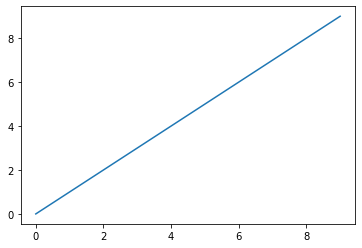

In [17]:
plt.plot(data)

#### Figures and Subplots

In [18]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [19]:
ax1 = fig.add_subplot(2, 2, 1)

In [20]:
ax2 = fig.add_subplot(2, 2, 2)

In [21]:
ax3 = fig.add_subplot(2, 2, 3)

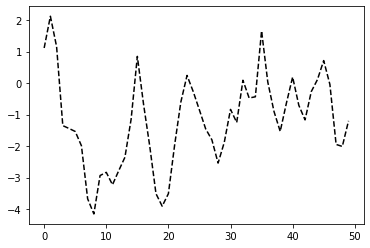

In [22]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [23]:
 _ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [24]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

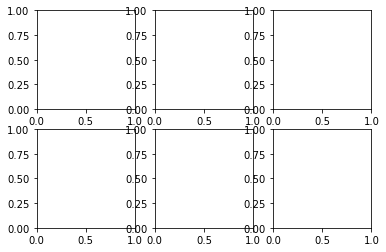

In [25]:
fig, axes = plt.subplots(2, 3)

In [26]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001941B9A37C0>,
      dtype=object)

#### Adjusting the spacing around subplots

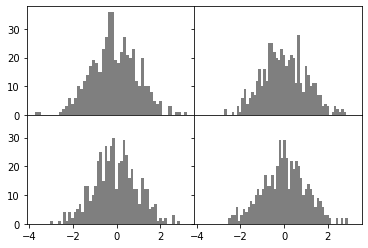

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [29]:
from numpy.random import randn

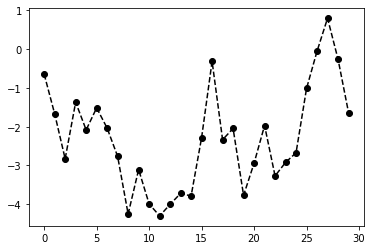

In [30]:
plt.plot(randn(30).cumsum(), 'ko--')

In [32]:
#plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [33]:
data = np.random.randn(30).cumsum()

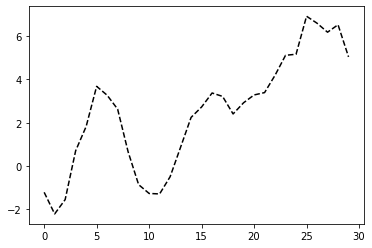

In [34]:
 plt.plot(data, 'k--', label='Default')

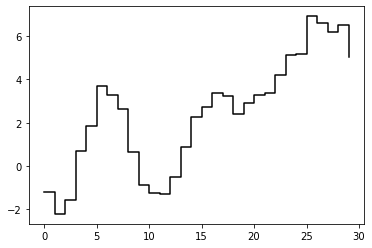

In [35]:
 plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

No handles with labels found to put in legend.


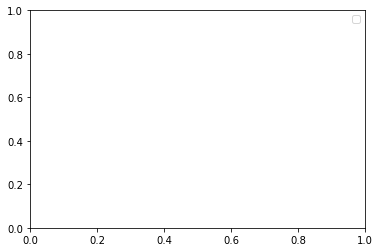

In [37]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

In [38]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [39]:
ax = fig.add_subplot(1, 1, 1)

In [40]:
ax.plot(np.random.randn(1000).cumsum())

In [41]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [42]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [43]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [44]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

### Adding legends

In [45]:
from numpy.random import randn

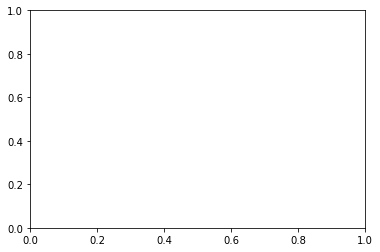

In [46]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [47]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [48]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [49]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [50]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [53]:
# ax.text(x, y, 'Hello world!',
  #     family='monospace', fontsize=10)

In [54]:
from datetime import datetime

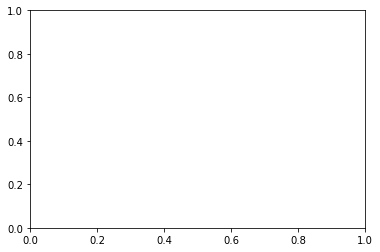

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

## 9.2 Plotting with pandas and seaborn

### Line Plots

In [56]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

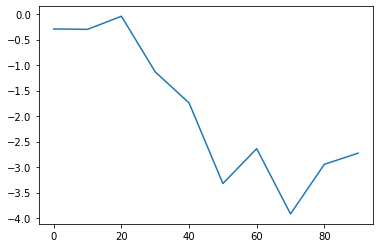

In [57]:
s.plot()

In [58]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

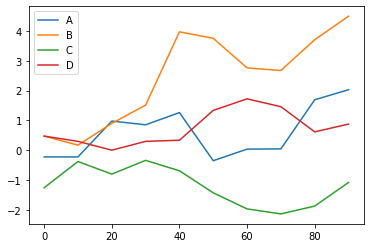

In [59]:
df.plot()

### Bar Plots

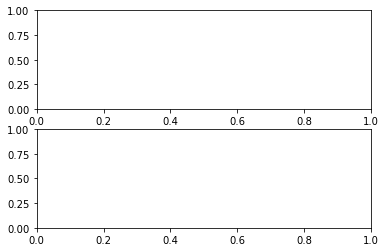

In [60]:
fig, axes = plt.subplots(2, 1)

In [61]:
 data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [62]:
 data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [63]:
 data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [64]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [65]:
df

Genus,A,B,C,D
one,0.014234,0.025874,0.411009,0.021859
two,0.746196,0.150193,0.745177,0.881107
three,0.347757,0.435247,0.737001,0.619097
four,0.652028,0.486122,0.314299,0.288237
five,0.009179,0.161912,0.440225,0.740561
six,0.427137,0.888272,0.795009,0.103344


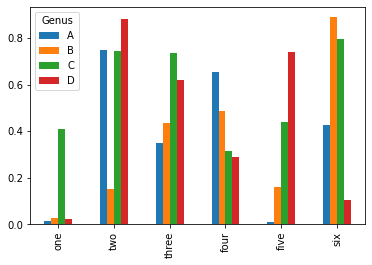

In [66]:
df.plot.bar()

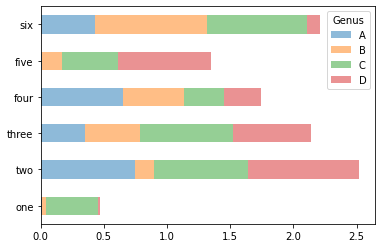

In [67]:
 df.plot.barh(stacked=True, alpha=0.5)

In [176]:
tips = pd.read_csv('tips.csv')

In [177]:
 party_counts = pd.crosstab(tips['day'], tips['size'])

In [181]:
import seaborn as sns

In [178]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [179]:
 tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


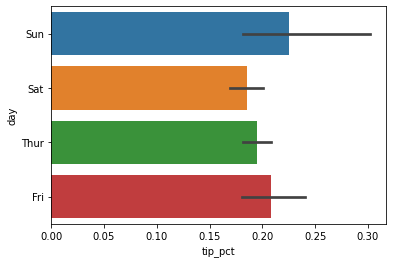

In [182]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

### Histograms and Density Plots

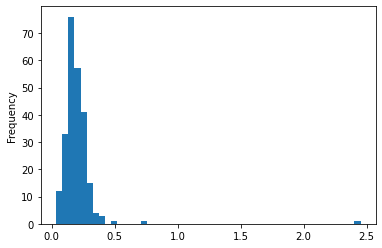

In [183]:
tips['tip_pct'].plot.hist(bins=50)

In [184]:
comp1 = np.random.normal(0, 1, size=200)

In [185]:
comp2 = np.random.normal(10, 2, size=200)

In [186]:
values = pd.Series(np.concatenate([comp1, comp2]))

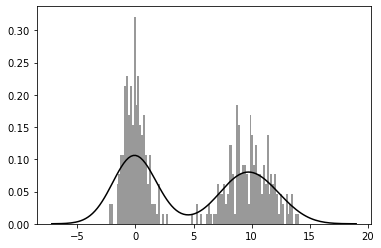

In [187]:
 sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [188]:
macro = pd.read_csv('macrodata.csv')

In [189]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [190]:
trans_data = np.log(data).diff().dropna()

In [191]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


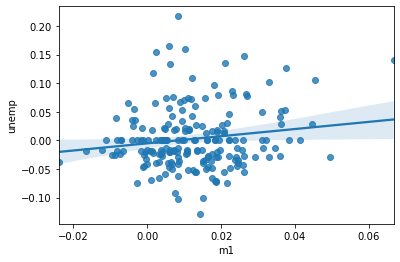

In [192]:
sns.regplot('m1', 'unemp', data=trans_data)

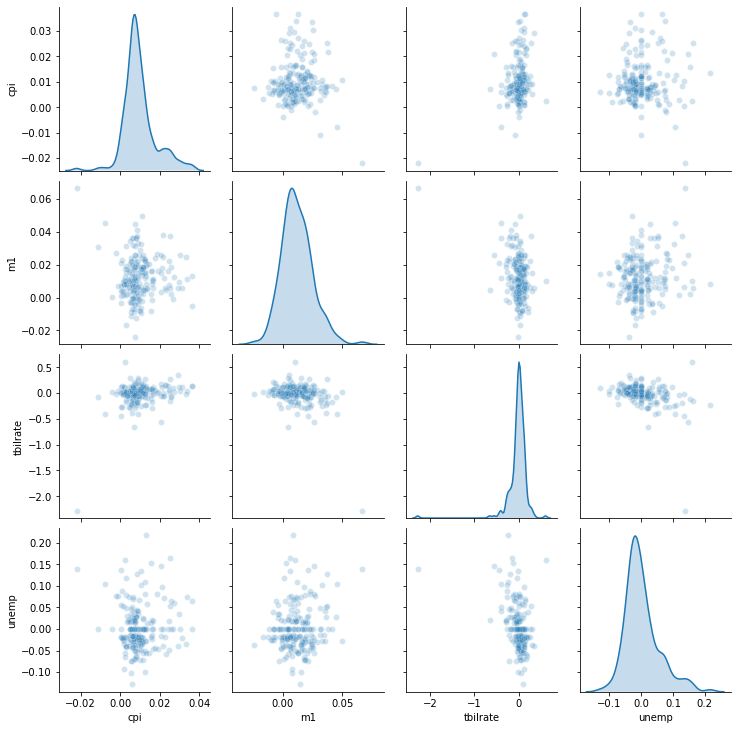

In [194]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## Facet Grids and Categorical Data

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


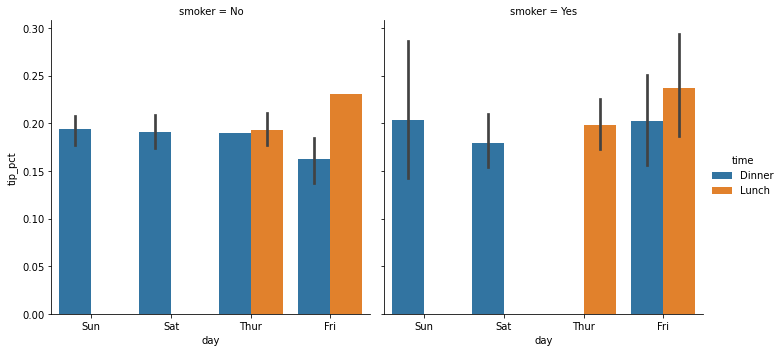

In [195]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

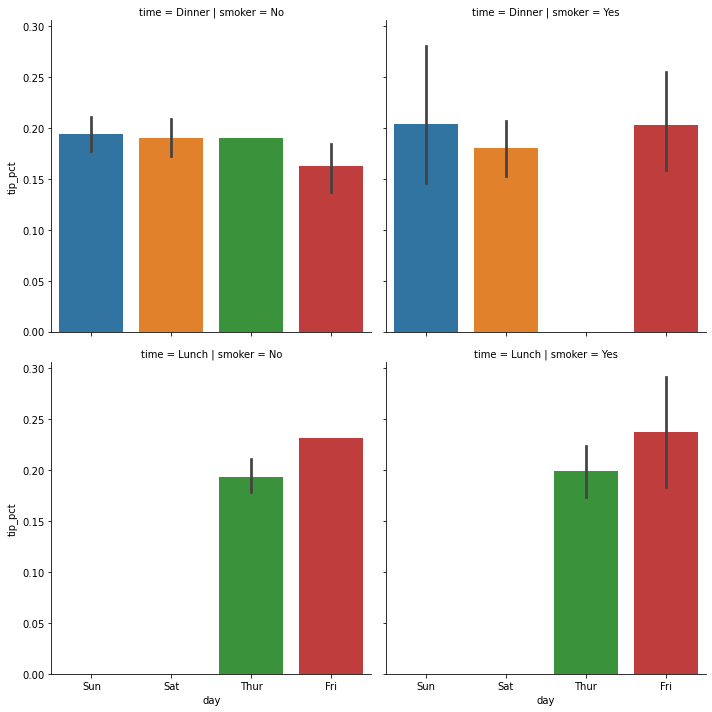

In [196]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

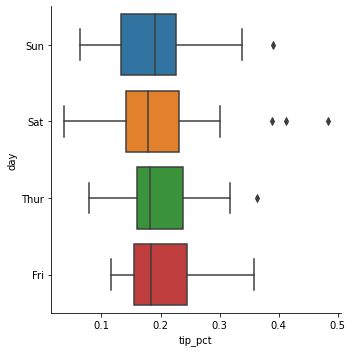

In [197]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

#### CHAPTER 10
## Data Aggregation and Group Operations

### 10.1 GroupBy Mechanics

In [74]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

In [75]:
df

,key1,key2,data1,data2
0,a,one,-0.242428,-0.019784
1,a,two,0.040404,-0.066453
2,b,one,0.499344,0.640431
3,b,two,1.339320,-0.088142
4,a,one,0.737228,-0.345366


In [76]:
grouped = df['data1'].groupby(df['key1'])

In [77]:
grouped

In [78]:
grouped.mean()

key1
a    0.178401
b    0.919332
Name: data1, dtype: float64

In [79]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [80]:
means

key1  key2
a     one     0.247400
      two     0.040404
b     one     0.499344
      two     1.339320
Name: data1, dtype: float64

In [81]:
 means.unstack()

key2,one,two
key1,,
a,0.247400,0.040404
b,0.499344,1.339320


In [82]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [83]:
 years = np.array([2005, 2005, 2006, 2005, 2006])

In [84]:
df['data1'].groupby([states, years]).mean()

California  2005    0.040404
            2006    0.499344
Ohio        2005    0.548446
            2006    0.737228
Name: data1, dtype: float64

In [85]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.178401,-0.143868
b,0.919332,0.276144


In [86]:
 df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.247400 -0.182575
     two   0.040404 -0.066453
b    one   0.499344  0.640431
     two   1.339320 -0.088142

In [87]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups

In [89]:
 for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.242428 -0.019784
1    a  two  0.040404 -0.066453
4    a  one  0.737228 -0.345366
b
  key1 key2     data1     data2
2    b  one  0.499344  0.640431
3    b  two  1.339320 -0.088142


In [90]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.242428 -0.019784
4    a  one  0.737228 -0.345366
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.040404 -0.066453
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.499344  0.640431
('b', 'two')
  key1 key2    data1     data2
3    b  two  1.33932 -0.088142


In [91]:
pieces = dict(list(df.groupby('key1')))

In [92]:
pieces['b']

,key1,key2,data1,data2
2,b,one,0.499344,0.640431
3,b,two,1.339320,-0.088142


In [93]:
 df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [94]:
grouped = df.groupby(df.dtypes, axis=1)

In [95]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.242428 -0.019784
1  0.040404 -0.066453
2  0.499344  0.640431
3  1.339320 -0.088142
4  0.737228 -0.345366
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

In [96]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.182575
     two  -0.066453
b    one   0.640431
     two  -0.088142

In [97]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [98]:
s_grouped

In [99]:
 s_grouped.mean()

key1  key2
a     one    -0.182575
      two    -0.066453
b     one     0.640431
      two    -0.088142
Name: data2, dtype: float64

### Grouping with Dicts and Series

In [100]:
 people = pd.DataFrame(np.random.randn(5, 5),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [101]:
people.iloc[2:3, [1, 2]] = np.nan

In [102]:
people

,a,b,c,d,e
Joe,-1.307841,-0.778532,-0.383346,0.182905,-0.966952
Steve,0.067126,-1.526006,2.178739,0.470168,1.021307
Wes,1.663425,NaN,NaN,1.054475,-1.955421
Jim,-0.237290,0.008946,1.589803,0.547567,0.108871
Travis,0.801040,1.549594,2.559410,0.145225,0.262206


In [103]:
 mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
            'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [104]:
by_column = people.groupby(mapping, axis=1)

In [105]:
 by_column.sum()

,blue,red
Joe,-0.200442,-3.053325
Steve,2.648906,-0.437573
Wes,1.054475,-0.291996
Jim,2.137370,-0.119473
Travis,2.704636,2.612840


In [106]:
map_series = pd.Series(mapping)

In [107]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [108]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions

In [109]:
 people.groupby(len).sum()

,a,b,c,d,e
3,0.118294,-0.769586,1.206457,1.784947,-2.813502
5,0.067126,-1.526006,2.178739,0.470168,1.021307
6,0.801040,1.549594,2.559410,0.145225,0.262206


In [110]:
 key_list = ['one', 'one', 'one', 'two', 'two']

In [111]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.307841 -0.778532 -0.383346  0.182905 -1.955421
  two -0.237290  0.008946  1.589803  0.547567  0.108871
5 one  0.067126 -1.526006  2.178739  0.470168  1.021307
6 two  0.801040  1.549594  2.559410  0.145225  0.262206

### Grouping by Index Levels

In [112]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])

In [113]:
 hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [114]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.021974  0.083833  0.389483 -0.371666 -0.423049
1      1.082998 -0.995563 -1.266471  1.050526 -2.209182
2      0.890651 -0.799119 -1.145760 -1.038628 -0.209212
3      2.863089 -1.464789  0.936571  0.729104 -0.254251

In [115]:
 hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 10.2 Data Aggregation

In [116]:
df

,key1,key2,data1,data2
0,a,one,-0.242428,-0.019784
1,a,two,0.040404,-0.066453
2,b,one,0.499344,0.640431
3,b,two,1.339320,-0.088142
4,a,one,0.737228,-0.345366


In [117]:
grouped = df.groupby('key1')

In [118]:
grouped['data1'].quantile(0.9)

key1
a    0.597863
b    1.255322
Name: data1, dtype: float64

In [119]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [120]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.979656,0.325582
b,0.839976,0.728573


In [121]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.178401  0.504196 -0.242428 -0.101012  0.040404  0.388816   
b      2.0  0.919332  0.593952  0.499344  0.709338  0.919332  1.129326   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.737228   3.0 -0.143868  0.176056 -0.345366 -0.205910 -0.066453   
b     1.339320   2.0  0.276144  0.515179 -0.088142  0.094001  0.276144   

                          
           75%       max  
key1                      
a    -0.043119 -0.019784  
b     0.458287  0.640431

### Column-Wise and Multiple Function Application

In [198]:
tips = pd.read_csv('tips.csv')

In [199]:
 tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [200]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [201]:
grouped = tips.groupby(['day', 'smoker'])

In [202]:
grouped_pct = grouped['tip_pct']

In [203]:
 grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [205]:
 grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [206]:
 functions = ['count', 'mean', 'max']

In [207]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

<ipython-input-207-426117f1e146>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


In [208]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [209]:
 result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [210]:
 ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [211]:
 grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-211-c2b2ffd79840>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [212]:
 grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [213]:
 grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
              'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

##### Returning Aggregated Data Without Row Indexes

In [214]:
 tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


### 10.3 Apply: General split-apply-combine

In [215]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [216]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [217]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [218]:
 tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [219]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [220]:
 result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [221]:
 result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
                    ...    
50%    Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
Length: 16, dtype: float64

### Suppressing the Group Keys

In [222]:
 tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Quantile and Bucket Analysis

In [126]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

In [127]:
 quartiles = pd.cut(frame.data1, 4)

In [128]:
 quartiles[:10]

0     (0.0523, 1.544]
1    (-1.439, 0.0523]
2     (0.0523, 1.544]
3      (1.544, 3.036]
4    (-1.439, 0.0523]
5    (-1.439, 0.0523]
6    (-1.439, 0.0523]
7    (-1.439, 0.0523]
8    (-1.439, 0.0523]
9     (0.0523, 1.544]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.937, -1.439] < (-1.439, 0.0523] < (0.0523, 1.544] < (1.544, 3.036]]

In [129]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [130]:
grouped = frame.data2.groupby(quartiles)

In [131]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-2.937, -1.439]",-3.283904,2.187509,79.0,0.153010
"(-1.439, 0.0523]",-2.833365,3.264422,441.0,0.105021
"(0.0523, 1.544]",-2.959746,3.095035,416.0,0.029103
"(1.544, 3.036]",-2.481268,2.827472,64.0,0.118152


In [132]:
 grouping = pd.qcut(frame.data1, 10, labels=False)

In [133]:
grouped = frame.data2.groupby(grouping)

In [134]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.283904,2.187509,100.0,0.139520
1,-2.394926,2.449303,100.0,0.118797
2,-2.833365,3.264422,100.0,0.210232
3,-2.127236,2.932006,100.0,-0.020291
4,-2.251475,2.700542,100.0,0.095952
5,-2.578035,2.450403,100.0,0.017444
6,-2.959746,3.095035,100.0,0.027339
7,-1.827215,2.222281,100.0,0.041509
8,-2.396035,2.768788,100.0,0.032000


### Example: Filling Missing Values with Group-Specific Values

In [135]:
 s = pd.Series(np.random.randn(6))

In [136]:
s[::2] = np.nan

In [137]:
 s

0         NaN
1   -1.141771
2         NaN
3   -0.653630
4         NaN
5   -1.866678
dtype: float64

In [138]:
 s.fillna(s.mean())

0   -1.220693
1   -1.141771
2   -1.220693
3   -0.653630
4   -1.220693
5   -1.866678
dtype: float64

In [139]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [140]:
 group_key = ['East'] * 4 + ['West'] * 4

In [141]:
data = pd.Series(np.random.randn(8), index=states)

In [142]:
data

Ohio          0.627172
New York      0.432550
Vermont       0.229796
Florida      -0.413147
Oregon       -0.519365
Nevada        1.298511
California    0.584966
Idaho        -0.068208
dtype: float64

In [143]:
 data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [144]:
data

Ohio          0.627172
New York      0.432550
Vermont            NaN
Florida      -0.413147
Oregon       -0.519365
Nevada             NaN
California    0.584966
Idaho              NaN
dtype: float64

In [145]:
data.groupby(group_key).mean()

East    0.215525
West    0.032800
dtype: float64

In [146]:
 fill_mean = lambda g: g.fillna(g.mean())

In [147]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.627172
New York      0.432550
Vermont       0.215525
Florida      -0.413147
Oregon       -0.519365
Nevada        0.032800
California    0.584966
Idaho         0.032800
dtype: float64

In [148]:
fill_values = {'East': 0.5, 'West': -1}

In [149]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [150]:
data.groupby(group_key).apply(fill_func)

Ohio          0.627172
New York      0.432550
Vermont       0.500000
Florida      -0.413147
Oregon       -0.519365
Nevada       -1.000000
California    0.584966
Idaho        -1.000000
dtype: float64

### Example: Random Sampling and Permutation

In [153]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)

In [154]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [155]:
def draw(deck, n=5):
    return deck.sample(n)

In [156]:
draw(deck)

8C      8
9C      9
10S    10
KH     10
8S      8
dtype: int64

In [157]:
get_suit = lambda card: card[-1] 

In [158]:
deck.groupby(get_suit).apply(draw, n=2)

C  QC    10
   9C     9
D  7D     7
   JD    10
H  5H     5
   2H     2
S  2S     2
   QS    10
dtype: int64

In [159]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

JC    10
QC    10
AD     1
JD    10
5H     5
AH     1
KS    10
3S     3
dtype: int64

### Example: Group Weighted Average and Correlation

In [6]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})

In [7]:
df

,category,data,weights
0,a,-1.293951,0.827651
1,a,-1.208569,0.216973
2,a,0.365383,0.179635
3,a,-0.117122,0.010820
4,b,0.147017,0.215816
5,b,-0.829269,0.873530
6,b,0.334418,0.647443
7,b,-0.116302,0.508667


In [8]:
grouped = df.groupby('category')

In [9]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [10]:
grouped.apply(get_wavg)

category
a   -1.027301
b   -0.238395
dtype: float64

In [11]:
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
             index_col=0)


In [12]:
close_px.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [13]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [14]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [15]:
rets = close_px.pct_change().dropna()

In [16]:
get_year = lambda x: x.year

In [17]:
by_year = rets.groupby(get_year)

In [18]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [19]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-Wise Linear Regression

In [20]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [21]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### 10.4 Pivot Tables and Cross-Tabulation

In [22]:
 tips.pivot_table(index=['day', 'smoker'])

NameError: name 'tips' is not defined

In [237]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [238]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                  aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [239]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                  columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
...                      ...       ...       ...       ...
Lunch  3    Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

In [1]:
data

NameError: name 'data' is not defined